In [2]:
#  importing the necessary libraries
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from sklearn.preprocessing import MinMaxScaler # for data scaling 
from sklearn.model_selection import train_test_split # for data splitting
import matplotlib.pyplot as plt # for data visualization



In [3]:
# Load the dataset
btc_data = pd.read_csv('BTC-USD.csv')

# Convert 'Date' to datetime and set as index
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data.set_index('Date', inplace=True)

# Selecting the 'Close' column and handling missing values if necessary
btc_close = btc_data['Close'].ffill()

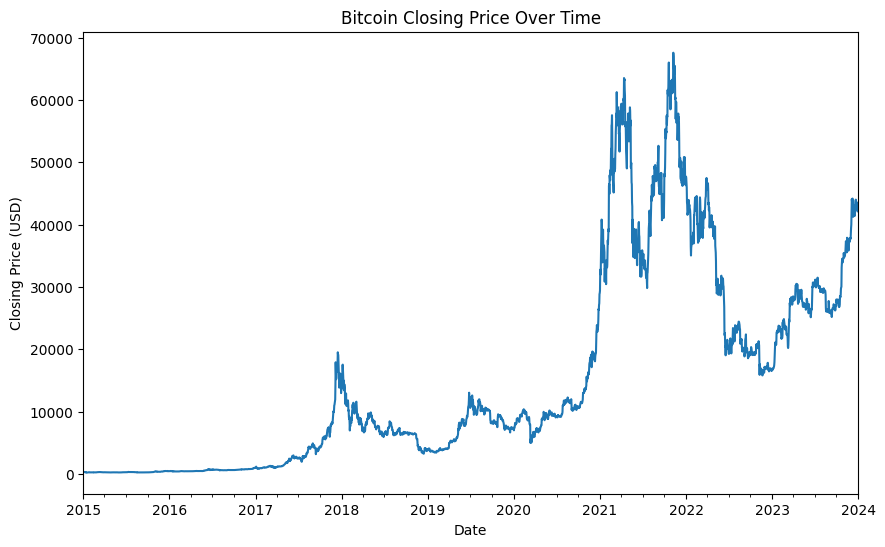

In [5]:
# Plotting the historical closing prices
btc_close.plot(figsize=(10, 6))
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()


In [6]:
# Normalize the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(btc_close.values.reshape(-1, 1))

In [8]:
# creating input sequences (dataX) and corresponding output values (dataY) for time series prediction.
def create_dataset(dataset, time_step=100): # The time series data, typically a NumPy array. | (default = 100): The number of time steps to be considered in each input sequence.
  dataX, dataY = [], []
    #The function iterates through the given dataset from the beginning to len(dataset) - time_step - 1.
    #For each iteration, it selects a sequence of length time_step from the dataset (along the first dimension, denoted by , 0) and appends it to dataX.
    #It also appends the value at the time step immediately following the selected sequence to dataY.
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY) #The function returns two NumPy arrays, np.array(dataX) containing input sequences and np.array(dataY) containing corresponding output values.

# Applying create_dataset
# The create_dataset function is applied to the normalized closing prices (scaled_close) with a specified time_step of 100.
# The resulting input sequences are stored in X, and the corresponding output values are stored in y.
time_step = 100
X, y = create_dataset(scaled_close, time_step)

***The purpose of 'create_dataset' function:*** is to prepare time series data for training a machine learning model, particularly for sequence prediction tasks like those encountered in recurrent neural networks (RNNs) or long short-term memory networks (LSTMs).

- [1- Sequence Creation:](#)
Generates input sequences (dataX) by taking a specified number of time steps (time_step) from the input time series data (dataset).

- [2- Corresponding Output Values:](#)
Creates corresponding output values (dataY) for each input sequence. These output values represent the next data point in the time series after each input sequence.

- [3- Formatting for Machine Learning:](#)
Prepares the data in a format suitable for supervised learning, where the model learns to predict an output based on a given input sequence.

- [4- NumPy Array Output:](#)
Returns NumPy arrays (np.array(dataX), np.array(dataY)) for compatibility with machine learning libraries like TensorFlow and Keras.



In [9]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) # Reshapes the input sequences (X_train and X_test) to add an additional dimension.
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) # Reshapes the input sequences (X_train and X_test) to add an additional dimension.
# The LSTM model in Keras expects input sequences to have the shape (batch_size, time_steps, features).
# Here, the added dimension corresponds to a single feature (closing prices), making the data compatible with the LSTM model.

The code segment facilitates the preparation of data for training and testing an LSTM model. It ensures that the input sequences are properly split into training and testing sets and are appropriately shaped to meet the requirements of the LSTM architecture. 
**This is a crucial step in preparing the data for training a machine learning model for time series prediction.**

Uses the ***train_test_split*** function from scikit-learn to split the dataset into training and testing sets.
- [X](#) represents the input sequences, and [y](#) represents the corresponding output values.
- [test_size=0.2](#) specifies that 20% of the data will be used for testing, and 80% will be used for training.
- [random_state=42](#) ensures reproducibility by using a fixed random seed.

In [10]:
# defines and trains an enhanced Long Short-Term Memory (LSTM) model using the Keras library:

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam

# Enhanced LSTM Model
model = Sequential() # Initializes a sequential model, allowing layers to be added sequentially.
model.add(Bidirectional(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))) # Adds a bidirectional LSTM layer with 100 units, returning sequences, and input shape specified by time_step (number of time steps) and 1 feature.
model.add(Dropout(0.2)) #  Adds a dropout layer with a dropout rate of 0.2 after each LSTM layer.
# Dropout layers help prevent overfitting by randomly setting a fraction of input units to zero during training.
model.add(Bidirectional(LSTM(100, return_sequences=False))) # Adds another bidirectional LSTM layer with 100 units but this time without returning sequences.
model.add(Dropout(0.2))
model.add(Dense(50)) # Adds a dense layer with 50 units.
model.add(Dense(1)) # Adds the output layer with a single unit, as it's a regression task predicting a continuous value (closing price).

# Compile the model
# Configures the model for training.
# Uses the Adam optimizer with a learning rate of 0.001.
# Specifies mean squared error as the loss function, suitable for regression tasks.
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=1, verbose=1)


80/80 [==============================] - 54s 518ms/step - loss: 0.0045


Model Architecture:

1- Sequential Model:
- [model = Sequential():](#) Initializes a sequential model, allowing layers to be added sequentially.

2- Bidirectional LSTM Layers:

- [Bidirectional(LSTM(100, return_sequences=True, input_shape=(time_step, 1))):](#) Adds a bidirectional LSTM layer with 100 units, returning sequences, and input shape specified by time_step (number of time steps) and 1 feature.
- [Bidirectional(LSTM(100, return_sequences=False)):](#) Adds another bidirectional LSTM layer with 100 units but this time without returning sequences.

3-Dropout Layers:
- [Dropout(0.2):](#) Adds a dropout layer with a dropout rate of 0.2 after each LSTM layer.
- Dropout layers help prevent overfitting by randomly setting a fraction of input units to zero during training.

4- Dense Layers:
- [Dense(50):](#) Adds a dense layer with 50 units.
- [Dense(1):](#) Adds the output layer with a single unit, as it's a regression task predicting a continuous value (closing price).

5- Compilation:
- [model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error'):](#) Configures the model for training.
  - Uses the Adam optimizer with a learning rate of 0.001.
  - Specifies mean squared error as the loss function, suitable for regression tasks.

6- Training:
- [model.fit(X_train, y_train, batch_size=32, epochs=1, verbose=1):](#) Trains the model on the training data.
  - X_train and y_train are the input sequences and corresponding output values.
  - batch_size=32 specifies the number of samples per gradient update.
  - epochs=1 defines the number of times the model will be trained on the entire training set.
  - verbose=1 displays training progress.

In [11]:
from keras.models import load_model
model = load_model('btc_prediction_model.h5')

This code segment visualizes the model's performance by comparing the real Bitcoin prices with the predicted prices on the testing set. It provides a clear visual representation of how well the model is able to capture the patterns in the data and make accurate predictions.

20/20 [==============================] - 6s 149ms/step


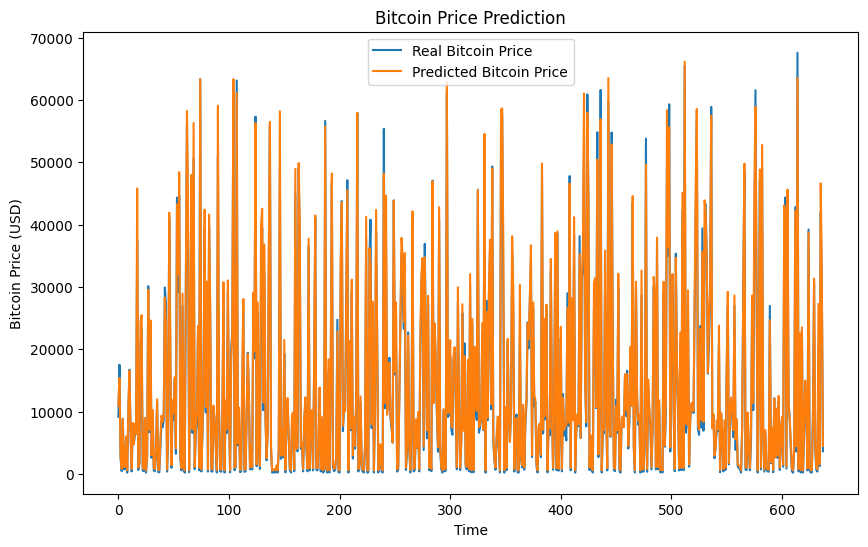

In [12]:
# This code is responsible for making predictions using the trained model and visualizing the results:
# Predict and inverse transform the scaled data
predictions = model.predict(X_test) # Uses the trained model to make predictions on the testing data (X_test), which contains input sequences not seen during training.
predictions = scaler.inverse_transform(predictions) # Inversely transforms the predicted values back to their original scale. This is necessary because the model was trained on normalized data.
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1)) # Inversely transforms the actual test values (y_test) to their original scale.

# Plotting
plt.figure(figsize=(10,6)) # Sets the size of the figure for the plot.
plt.plot(y_test_scaled, label='Real Bitcoin Price') # Plots the actual Bitcoin prices from the test set.
plt.plot(predictions, label='Predicted Bitcoin Price') # Plots the predicted Bitcoin prices.
# plot configuration 
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.legend() # Displays a legend indicating which line corresponds to real prices and which corresponds to predicted prices.
plt.show()


This code segment prepares the predicted and actual values for visualization by associating them with corresponding dates in Pandas DataFrames. These DataFrames can be used for further analysis, comparison, or plotting to assess the model's performance.

In [13]:
# Assuming 'predictions' and 'y_test' are already inverse transformed to their original scale

# Get the last date from the training set as a starting point for predictions
last_train_date = btc_close.index[-1] - pd.Timedelta(days=len(y_test)) # Obtains the last date from the training set (btc_close.index[-1]) and subtracts the length of the testing set (len(y_test)) as a starting point for predictions.

# Create a date range for predictions
prediction_dates = pd.date_range(start=last_train_date, periods=len(predictions), freq='D') # Generates a date range (prediction_dates) starting from the last date of the training set and extending for the length of the predictions. The frequency is set to daily ('D').

# Create a dataframe for the predictions with corresponding dates
# Creates two Pandas DataFrames (predictions_df and actual_df) using the prediction dates as the index.

predictions_df = pd.DataFrame(data=predictions, index=prediction_dates, columns=['Predicted']) # contains the predicted values under the column name 'Predicted'.
actual_df = pd.DataFrame(data=y_test_scaled, index=prediction_dates, columns=['Actual']) # contains the actual values (scaled) under the column name 'Actual'.


This code segment visualizes the monthly average predictions and actual values for Bitcoin prices. The resampling to monthly averages provides a smoother representation of trends and facilitates a clearer comparison between predicted and actual values over time. The scatter plot allows for an assessment of how well the model's predictions align with the actual monthly trends in Bitcoin prices.

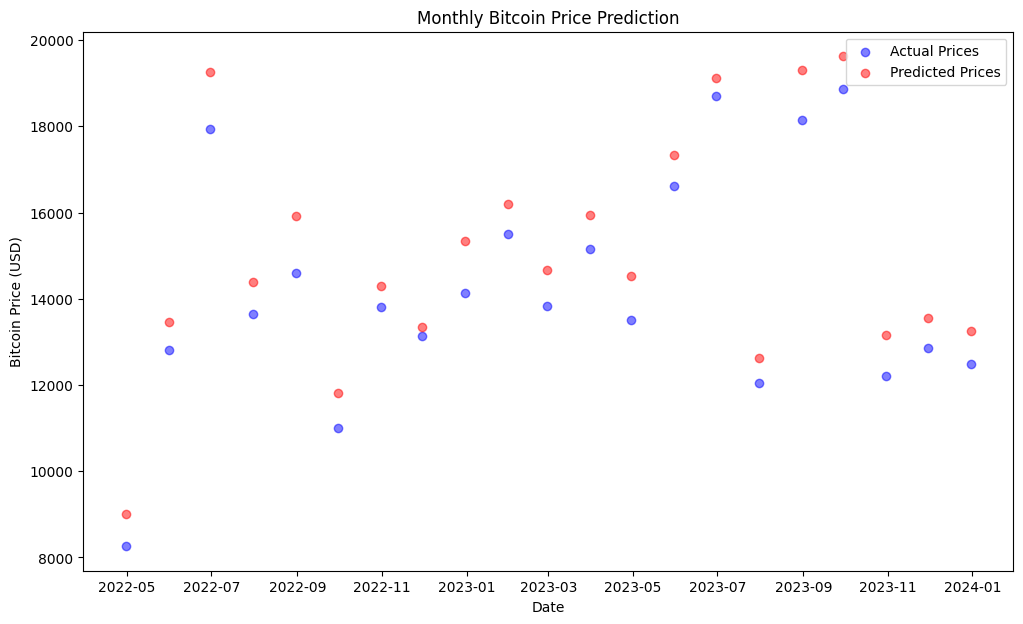

In [15]:
# Resample to monthly or yearly averages
# Resamples the predicted and actual values to monthly averages using the .resample('M').mean() method.
monthly_predictions = predictions_df['Predicted'].resample('M').mean()
monthly_actual = actual_df['Actual'].resample('M').mean()

# Plotting the aggregated data
plt.figure(figsize=(12,7)) # Creates a scatter plot with a figure size of (12, 7).
# plt.scatter() is used to plot the actual and predicted monthly average values.
plt.scatter(monthly_actual.index, monthly_actual, color='blue', label='Actual Prices', alpha=0.5) # alpha=0.5 sets the transparency of the markers for better visibility.
plt.scatter(monthly_predictions.index, monthly_predictions, color='red', label='Predicted Prices', alpha=0.5)
plt.title('Monthly Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()

This code segment predicts the future prices of Bitcoin for a specified date range and visualizes the predicted values over time. It leverages the trained LSTM model to make

1/1 [==============================] - 0s 53ms/step


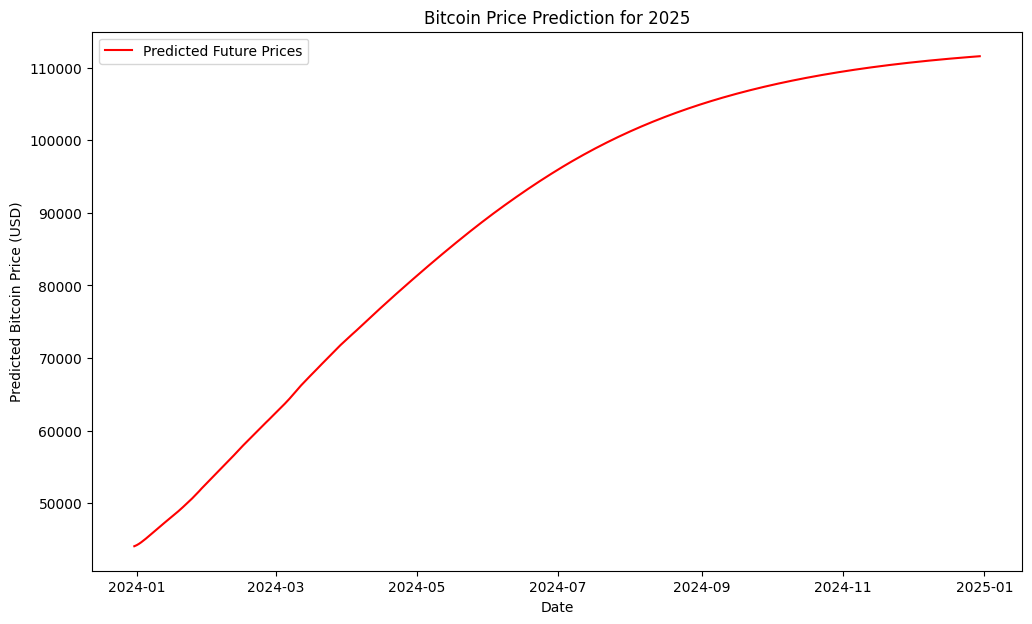

In [16]:
# Define the date range for the prediction
# Sets the start and end dates for the future prediction.
start_date = pd.to_datetime('2023-12-31')  # End of the last date with actual data
end_date = pd.to_datetime('2024-12-31')  # End of 2025

# Number of days to predict
num_days = (end_date - start_date).days # Computes the number of days between the start and end dates.

# Get the last `time_step` days from the dataset as the base for future predictions
# Takes the last time_step days from the actual data as the base for future predictions.
# Normalizes the input sequence using the same MinMaxScaler (scaler) used during training.
input_seq = btc_close[-time_step:].values.reshape(-1, 1)
input_seq = scaler.transform(input_seq)  # Assuming 'scaler' is your MinMaxScaler object



# Loop for each day in the prediction range
# Uses a loop to iteratively predict the future prices for each day.
# Reshapes the input sequence for LSTM prediction, predicts the next price, and appends it to the list of predictions.
future_predictions = [] # List to hold the predictions
for _ in range(num_days):
    # Reshape the input for LSTM prediction
    lstm_input = input_seq[-time_step:].reshape(1, time_step, 1)
    # Predict the next price
    predicted_price = model.predict(lstm_input)
    # Append the prediction to the list
    future_predictions.append(scaler.inverse_transform(predicted_price)[0, 0])
    # Update the input sequence with the predicted price
    input_seq = np.append(input_seq, predicted_price, axis=0)


# Create a date range for the prediction
# Creates a date range for the future predictions.
# Forms a Pandas DataFrame (future_predictions_df) to store the predicted prices with corresponding dates.
future_dates = pd.date_range(start=start_date, periods=num_days, freq='D')
# Create a dataframe for the predictions with corresponding dates
future_predictions_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted'])


# Plot the future predictions
plt.figure(figsize=(12, 7))
plt.plot(future_predictions_df.index, future_predictions_df['Predicted'], color='red', label='Predicted Future Prices')
plt.title('Bitcoin Price Prediction for 2025')
plt.xlabel('Date')
plt.ylabel('Predicted Bitcoin Price (USD)')
plt.legend()
plt.show()


1/1 [==============================] - 0s 55ms/step


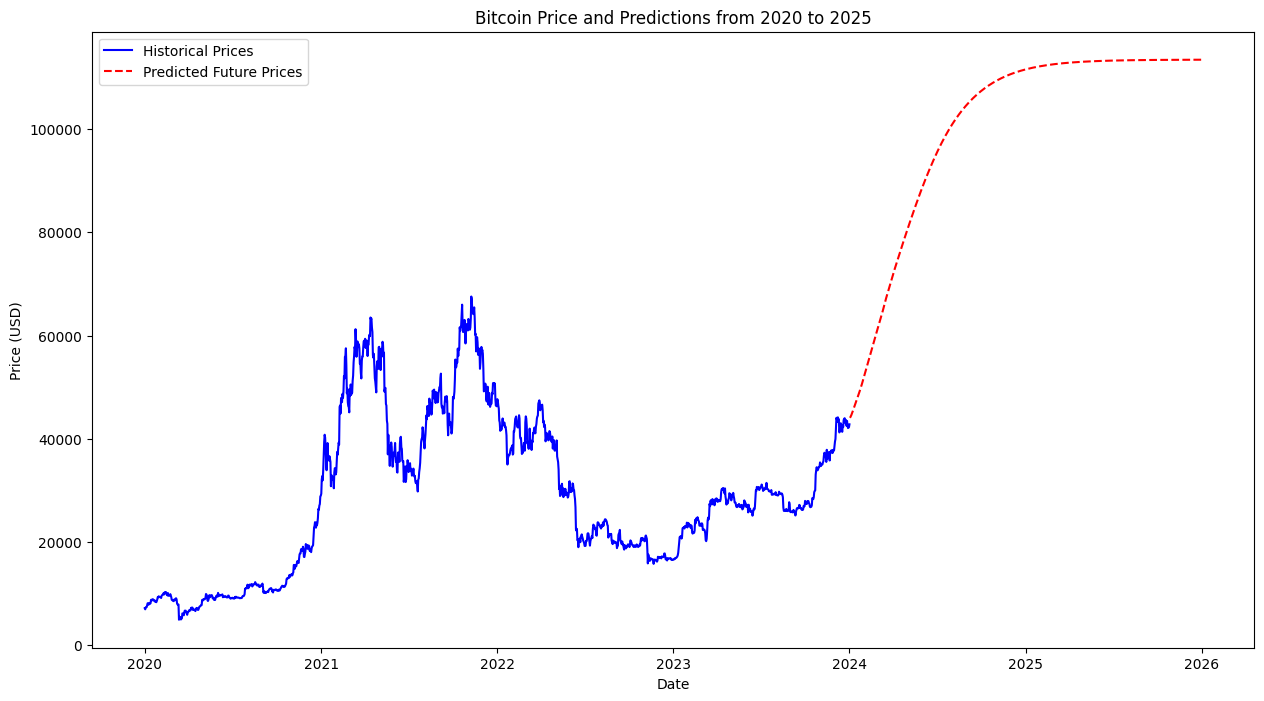

In [17]:
# Define the target year
# Specifies the target year for which predictions will be generated.
target_year = 2025

# Step 1: Extract historical data from 2020 onwards
# Filters historical Bitcoin closing prices, considering data from the year 2020 onwards.
historical_data = btc_close[btc_close.index.year >= 2020]

# Calculate the number of days to predict based on the target year
# Determines the number of days to predict based on the difference between the last historical date and the end prediction date.
last_historical_date = historical_data.index[-1]
end_prediction_date = pd.Timestamp(year=target_year, month=12, day=31)
num_days = (end_prediction_date - last_historical_date).days

# Step 2: Generate predictions for the future up to the target year

# Prepare the input sequence with the last known data points
# Prepares the input sequence with the last known data points, normalizing them using the MinMaxScaler.
input_seq = historical_data[-time_step:].values.reshape(-1, 1)
input_seq = scaler.transform(input_seq)

# Predict future prices
# Utilizes a loop to predict future Bitcoin prices using the LSTM model and appends them to the future_predictions list.
future_predictions = []
for _ in range(num_days):
    lstm_input = input_seq[-time_step:].reshape(1, time_step, 1)
    predicted_price = model.predict(lstm_input)
    future_predictions.append(scaler.inverse_transform(predicted_price)[0, 0])
    input_seq = np.append(input_seq, predicted_price, axis=0)

# Create a DataFrame for the future predictions with corresponding dates
# Generates a date range for the future predictions and creates a DataFrame (future_predictions_df) to store the predicted prices with corresponding dates.
future_dates = pd.date_range(start=last_historical_date + pd.Timedelta(days=1), periods=num_days, freq='D')
future_predictions_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted'])

# Step 3: Combine historical and predicted data into one DataFrame
# Combines the historical and predicted data into a single DataFrame (combined_data) using an outer join on the date index.
combined_data = historical_data.to_frame(name='Actual')
combined_data = combined_data.join(future_predictions_df, how='outer')

# Step 4: Plot the combined data
plt.figure(figsize=(15, 8))
plt.plot(combined_data.index, combined_data['Actual'], label='Historical Prices', color='blue')
plt.plot(combined_data.index, combined_data['Predicted'], label='Predicted Future Prices', color='red', linestyle='--')
plt.title(f'Bitcoin Price and Predictions from 2020 to {target_year}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [18]:
# model.save('enahnced_3.h5')  # This saves the model in HDF5 format

**Using the Generated Model btc_prediction_model.h5**


In [19]:
import pandas as pd

def predict_price(input_date):
    # Converts the input date to a pandas Timestamp for consistency in handling time-related data.
    input_date = pd.Timestamp(input_date)

    # Checks if the input date is outside the range covered by the historical data and future predictions. If so, it returns a message indicating that the date is out of the prediction range.
    if input_date < historical_data.index[0] or input_date > future_predictions_df.index[-1]:
        return "Date out of prediction range"

    # If the input date is within the prediction range, it checks if the date corresponds to a future prediction. If yes, it retrieves the predicted price. Otherwise, it retrieves the historical actual price for that date.
    if input_date in future_predictions_df.index:
        # Prediction for a future date
        predicted_price = future_predictions_df.loc[input_date]['Predicted']
    else:
        # Historical actual price
        predicted_price = historical_data.loc[input_date]['Actual']

    return predicted_price


In [20]:
import tkinter as tk
from datetime import datetime # Imports the datetime module for handling date and time operations.

def get_date(): # Defines a function to handle the button click event and retrieve the user-entered date.
    # Retrieve the date from the entry field
    date_string = date_entry.get()
    
    try:
        # Parse the date string into a datetime object
        entered_date = datetime.strptime(date_string, '%Y-%m-%d').date()
        # Call the prediction function | to get the predicted price for the entered date.
        predicted_price = predict_price(entered_date)
        # Clear the previous result
        result_label.config(text="")
        result_label.config(text=f"The predicted price for {entered_date} is {predicted_price}")# Display the result
        
    except ValueError:
        result_label.config(text="Please enter a valid date in YYYY-MM-DD format.")


# Set up the Tkinter window
# Sets up the main Tkinter window with a title, size, and centered position.
window = tk.Tk()
window.title("Bitcoin Price Prediction")
window.geometry("400x200")
window.eval('tk::PlaceWindow . center')# Set the window size and position it in the center of the screen

# Creates Tkinter GUI elements - a label, an entry field, a button, and a label for displaying the result.
# Packs the created GUI elements into the Tkinter window.

# Create a label, entry field, and button
label = tk.Label(window, text="Enter a date (YYYY-MM-DD):")
label.pack()

date_entry = tk.Entry(window)
date_entry.pack()

submit_button = tk.Button(window, text="Get Prediction", command=get_date)
submit_button.pack()

# Create a label to display the result
result_label = tk.Label(window, text="")
result_label.pack()

# Start the Tkinter event loop
# Initiates the Tkinter event loop, allowing the GUI to respond to user interactions.

window.mainloop()

: 